# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import os
# ---- Insert other imports ----

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [83]:
df_spotify_0 = pd.read_csv("spotify_data\streaminghistory0.csv")

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [84]:
help(pd.DataFrame.head)
help(pd.DataFrame.tail)

Help on function head in module pandas.core.generic:

head(self, n: 'int' = 5) -> 'Self'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [85]:
print("First five rows of the dataframe:")
pd.DataFrame.head(df_spotify_0, 5)

First five rows of the dataframe:


,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05,Lorde,Team,8984.0
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0


In [86]:
print("Last ten rows of dataframe:")
pd.DataFrame.tail(df_spotify_0, 10)

Last ten rows of dataframe:


,endTime,artistName,trackName,msPlayed
11949,2023-01-02 20:58,Ariana Grande,six thirty,1699.0
11950,2023-01-02 20:58,Leonard Cohen,Thanks for the Dance,19483.0
11951,2023-01-02 20:59,Des Rocs,Used to the Darkness,185.0
11952,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,603.0
11953,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,208.0
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [87]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])

#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [88]:
unique_artists = df_spotify_0['artistName'].nunique()

print("Number of unique artists:", unique_artists)

Number of unique artists: 495


#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [89]:
unique_songs = df_spotify_0['trackName'].nunique()

print("Number of unique artists:", unique_songs)

Number of unique artists: 1308


### Part 1: Questions
Q1: Which columns are in the dataset?

Q2: What timeframe does the dataset span?

Q3: How many unique artists are in the dataset?

Q4: How many unique songs are in the dataset?

Answer to Q1: There are 4 columns (5 if index counts, which is the first column). The columns are endTime, artistName, songname and msPlayed.

Answer to Q2: the timeframe of the dataset spans from 2023-01-02 20:58 to 2023-01-02 20:59:00.

Answer to Q3: There are 495 unique artists in the dataset.

Answer to Q4: There are 1308 unique songs in the dataset

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [90]:
# Create an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file
for i in range(14):
    filename = f"spotify_data/streaminghistory{i}.csv"
    if os.path.exists(filename):
        # Read the CSV file into a DataFrame
        df_temp = pd.read_csv(filename)
        # Append the DataFrame to the list
        dfs.append(df_temp)

# Concatenate all DataFrames in the list into one large DataFrame
df = pd.concat(dfs, ignore_index=True)

# Now df contains all the data from streaminghistory0.csv to streaminghistory13.csv

#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [91]:
df = df.sort_values(by='endTime')

# Now df contains the DataFrame sorted in chronological order from oldest to newest


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [92]:
# Convert 'endTime' column to datetime in the new data frame also
df['endTime'] = pd.to_datetime(df['endTime'])
df = df[df['endTime'].dt.year == 2023]

#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [93]:
df = df.dropna(axis=0)
df
#doesnt notice any change, because rows that had Nan-value was outside of the span of 2023, so they already got removed.

,endTime,artistName,trackName,msPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,139.0
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,487.0
10883,2023-01-01 01:17:00,Ariana Grande,positions,417.0
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0
...,...,...,...,...
167429,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,1497.0
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13448.0
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [94]:
df["secPlayed"]= df["msPlayed"]/1000
df.drop(columns=['msPlayed'])

,endTime,artistName,trackName,secPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278
...,...,...,...,...
167429,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,1.497
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9.317
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23.757


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

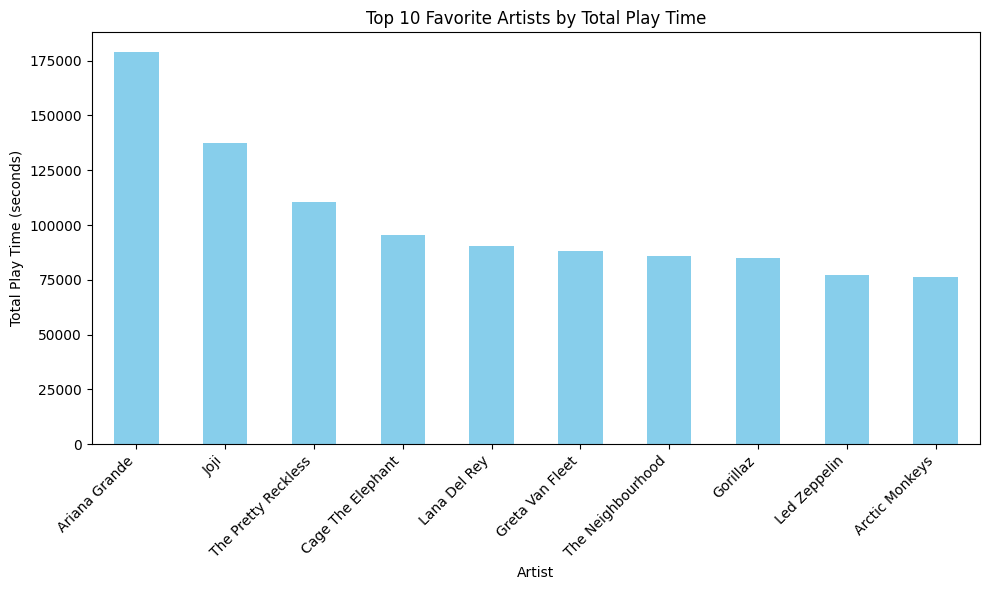

In [95]:
# Create a new DataFrame with 'artistName' and 'secPLayed' columns
df_artist_time = df[['artistName', 'secPlayed']]


# Group by 'artistName' and sum the play time for each artist
df_artist_total_time = df_artist_time.groupby('artistName')['secPlayed'].sum()

# Sort the DataFrame by total play time in descending order
df_top_ten_artists = df_artist_total_time.sort_values(ascending=False).head(10)

# Plot the findings in a bar graph
plt.figure(figsize=(10, 6))
df_top_ten_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Favorite Artists by Total Play Time')
plt.xlabel('Artist')
plt.ylabel('Total Play Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

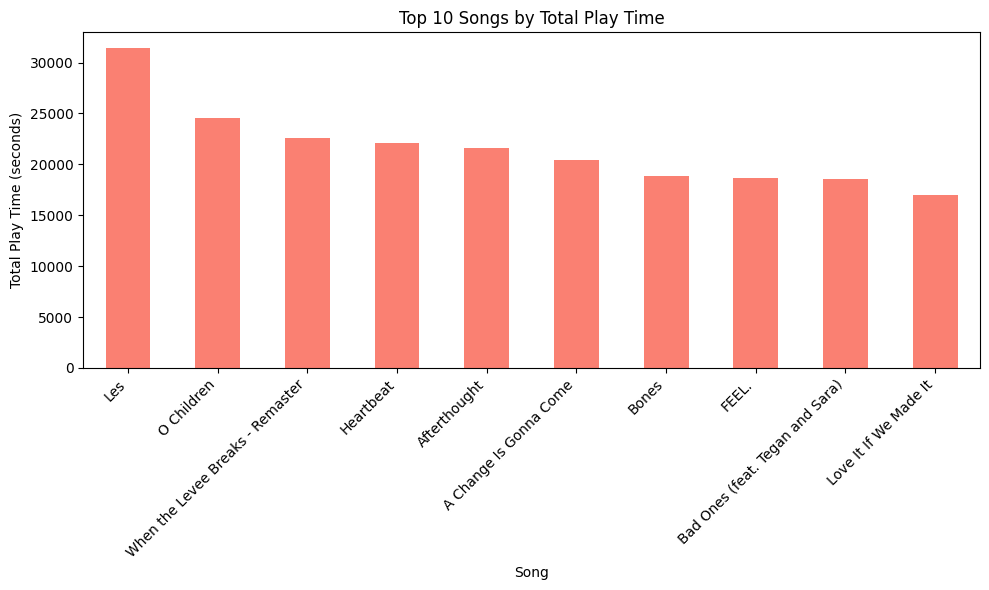

In [96]:
# Create a new DataFrame with 'trackName' and 'secPlayed' columns
df_song_time = df[['trackName', 'secPlayed']]

# Group by 'trackName' and sum the play time for each song
df_song_total_time = df_song_time.groupby('trackName')['secPlayed'].sum()

# Sort the DataFrame by total play time in descending order
df_top_ten_songs = df_song_total_time.sort_values(ascending=False).head(10)

# Plot the findings in a bar graph
plt.figure(figsize=(10, 6))
df_top_ten_songs.plot(kind='bar', color='salmon')
plt.title('Top 10 Songs by Total Play Time')
plt.xlabel('Song')
plt.ylabel('Total Play Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

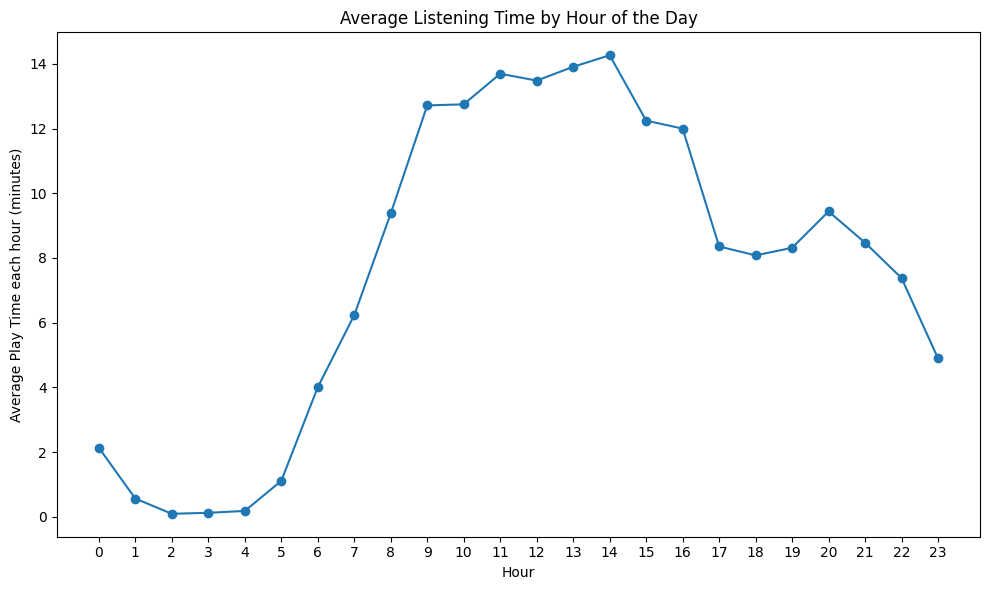

In [97]:
df['hour'] = df['endTime'].dt.hour

# Find the earliest and latest dates
earliest_date = df['endTime'].min()
latest_date = df['endTime'].max()

# Calculate the difference in days
total_days = (latest_date - earliest_date).days + 1  # Adding 1 to include both start and end dates


# Group by hour and calculate total seconds played for each hour
total_per_hour = df.groupby(['hour'], as_index=False)['secPlayed'].sum()

# Calculate the average time played for each hour
avg_time_played = total_per_hour['secPlayed'] / (total_days*60) #divide by 60 also so the plot displays y-axis in minutes

# Plot the average play time for each hour
plt.figure(figsize=(10, 6))
plt.plot(total_per_hour['hour'], avg_time_played, marker='o')
plt.title('Average Listening Time by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Play Time each hour (minutes)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

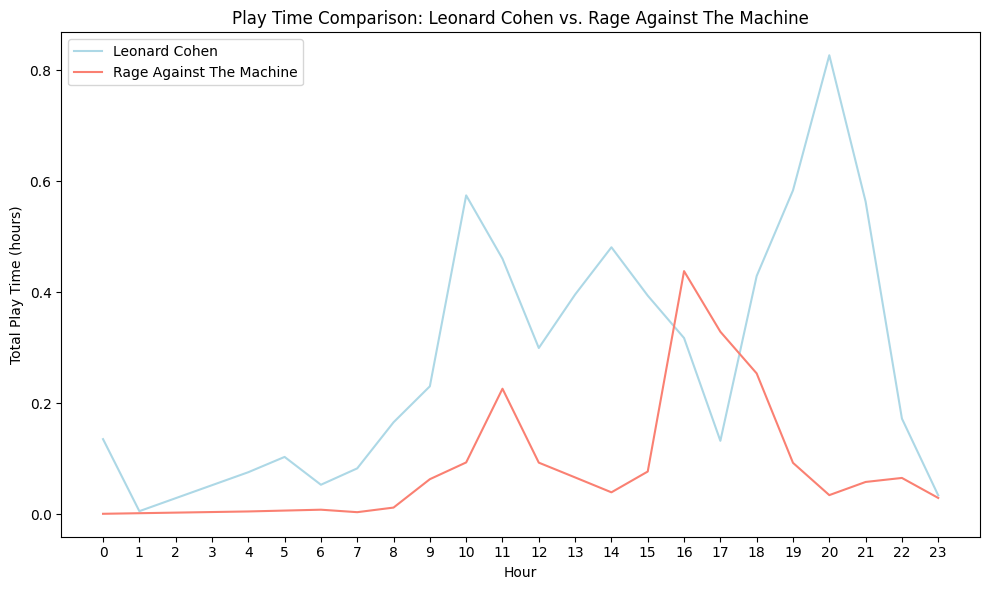

In [98]:
# Filter the DataFrame for Leonard Cohen and Rage Against The Machine
cohen_df = df[df['artistName'] == 'Leonard Cohen']
rage_df = df[df['artistName'] == 'Rage Against The Machine']

# Group by hour and calculate the total play time for each hour for Leonard Cohen
cohen_play_time_by_hour = cohen_df.groupby(cohen_df['endTime'].dt.hour)['secPlayed'].sum() / 3600  # Convert seconds to hours

# Group by hour and calculate the total play time for each hour for Rage Against The Machine
rage_play_time_by_hour = rage_df.groupby(rage_df['endTime'].dt.hour)['secPlayed'].sum() / 3600  # Convert seconds to hours

# Plot the comparison
plt.figure(figsize=(10, 6))
cohen_play_time_by_hour.plot(label='Leonard Cohen', color='lightblue')
rage_play_time_by_hour.plot(label='Rage Against The Machine', color='salmon')
plt.title('Play Time Comparison: Leonard Cohen vs. Rage Against The Machine')
plt.xlabel('Hour')
plt.ylabel('Total Play Time (hours)')
plt.legend()
plt.xticks(range(24))
plt.tight_layout()
plt.show()

It looks like RATM, is more likely to be played during the day, from 08am to 20pm. Leonard Cohen can also get played during the day, but he get's listened to more freqently at the evning, from 17pm to 23pm.

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [99]:
# Add a new column 'skipped' to the DataFrame based on the given criteria
df['skipped'] = df['secPlayed'].apply(lambda x: 1 if x < 30 else 0)

#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

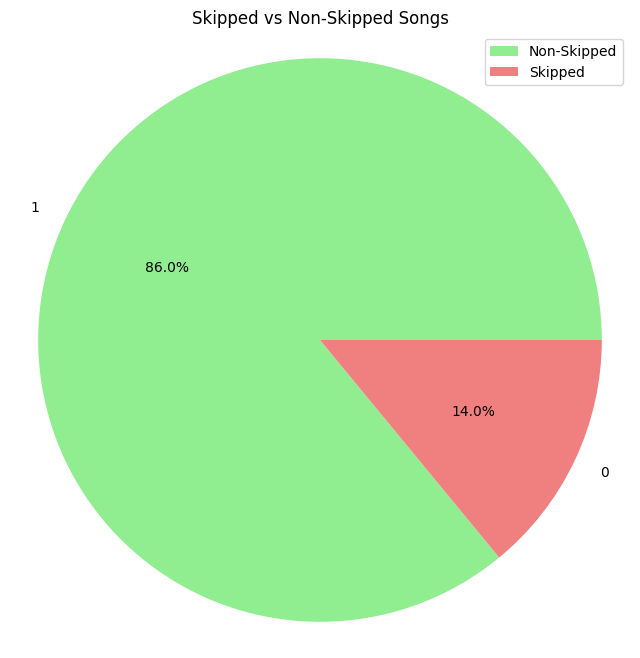

In [100]:
# Count the occurrences of each category in the 'skipped' column
skipped_counts = df['skipped'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(skipped_counts, labels=skipped_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Skipped vs Non-Skipped Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(labels=['Non-Skipped', 'Skipped'], loc="upper right")

plt.show()



#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [106]:
# Group the DataFrame by artist and calculate the total number of songs and skipped songs for each artist
df_skipped = df.groupby('artistName')['skipped'].agg(['count', 'sum'])

# Calculate the percentage of skipped songs for each artist
df_skipped['SkipRate'] = (df_skipped['sum'] / df_skipped['count']) * 100

# Reset the index to make 'artistName' a column again
df_skipped.reset_index(inplace=True)

# Rename the column 'count' to 'TotalSongs'
df_skipped.rename(columns={'count': 'TotalSongs'}, inplace=True)

# Display the resulting DataFrame
print(df_skipped)


        artistName  TotalSongs  sum    SkipRate
0             10cc          28   19   67.857143
1             2Pac         513  442   86.159844
2     3 Doors Down           2    1   50.000000
3    4 Non Blondes         122   88   72.131148
4          50 Cent          28   19   67.857143
..             ...         ...  ...         ...
951        squeeda           3    2   66.666667
952     tenkousei.          37   37  100.000000
953       trxxshed           2    1   50.000000
954        xander.           8    3   37.500000
955     Édith Piaf         155  146   94.193548

[956 rows x 4 columns]


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [102]:
# Sort the DataFrame by 'SkipRate' in ascending order (lowest skip-rate first)
df_skipped_sorted = df_skipped.sort_values(by='SkipRate')

# Find the top three artists with the lowest skip-rate
top_three_lowest_skip_rate = df_skipped_sorted.head(3)

# Find the top three artists with the highest skip-rate
top_three_highest_skip_rate = df_skipped_sorted.tail(3)

# Print the names and skip-rates of the top three artists with the lowest skip-rate
print("Top three artists with the lowest skip-rate:")
print(top_three_lowest_skip_rate[['artistName', 'SkipRate']])

# Print the names and skip-rates of the top three artists with the highest skip-rate
print("\nTop three artists with the highest skip-rate:")
print(top_three_highest_skip_rate[['artistName', 'SkipRate']])


Top three artists with the lowest skip-rate:
        artistName   SkipRate
305  Gloria Gaynor   0.000000
645       Roc Boyz  11.111111
437          LACES  14.285714

Top three artists with the highest skip-rate:
         artistName  SkipRate
290         G Mills     100.0
628           Ramón     100.0
417  Kelly Clarkson     100.0


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [103]:
df_ariana = df[df['artistName'] == 'Ariana Grande']

#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

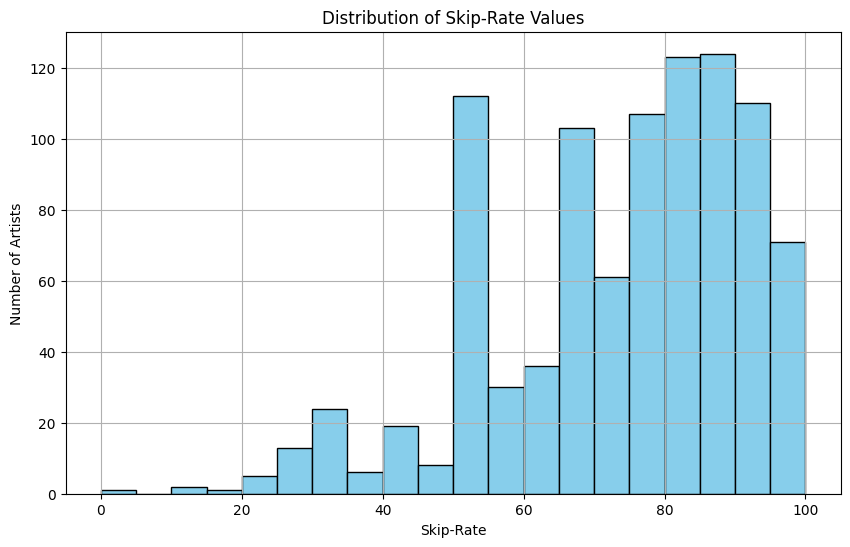

Skip rate for Ariana Grande: 99.52939959662822
Average skip rate for all artists: 73.04822293282288


In [104]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Create a histogram of skip-rate values
plt.figure(figsize=(10, 6))
plt.hist(df_skipped['SkipRate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Skip-Rate Values')
plt.xlabel('Skip-Rate')
plt.ylabel('Number of Artists')
plt.grid(True)
plt.show()

# Retrieve the skip rate for Ariana Grande
ariana_skip_rate = df_skipped[df_skipped['artistName'] == 'Ariana Grande']['SkipRate'].values[0]

print("Skip rate for Ariana Grande:", ariana_skip_rate)
print("Average skip rate for all artists:", df_skipped["SkipRate"].mean())



Ariana's skip rate is way higher than the average skip-rate for artists, and would be one of the most skipped artists in the data set

### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?

Answer to Q1: The skip rate for Ariana Grande was 99.5%, so it's very high relative to the other artist that has been listened to.

Answer to Q2: For me it doens't make sense to have Ariana Grande as the top artist when it's 0.05% chance that her songs will not be skipped. A possible reason for Ariana Grande to be on number one in this case, is because the data is manipulated. 